# RAIN AUSTRALIA PREDICTION

# PROBLEM STATEMENT

The ability to anticipate rain is a crucial component of weather forecasting that has an impact on a number of sectors, including transportation, agriculture, and urban planning. Due to the complicated interaction of weather variables like MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, and RainTomorrow, traditional meteorological models frequently struggle to predict rain with accuracy.

The objective of this data science project is to create a machine learning-based rain prediction model that uses previous weather data and these characteristics to precisely predict whether it will rain today (RainToday) and the next day (RainTomorrow). To obtain the best level of accuracy in rain prediction, the project will require studying and analysing various features, choosing suitable machine learning methods, and optimising model performance. The effective application of such a model would have substantial effects on enhancing decision-making in transportation, urban planning, and agriculture, as well as on empowering stakeholders to make decisions based on accurate rain forecast data.

This project is another simple approach, which helps predicting of rain occurrence using 22 characteristics: 

* MinTemp: Minimum recorded temperature (°C)
* MaxTemp: Maximum recorded temperature (°C)
* Rainfall: Amount of rainfall (mm)
* Evaporation: Water evaporation (mm)
* Sunshine: Hours of sunshine
* WindGustSpeed: Maximum wind gust speed (km/h)
* WindSpeed9am: Average wind speed at 9 a.m. (km/h)
* WindSpeed3pm: Average wind speed at 3 p.m. (km/h)
* Humidity9am: Relative humidity at 9 a.m. (%)
* Humidity3pm: Relative humidity at 3 p.m. (%)
* Pressure9am: Atmospheric pressure at 9 a.m. (hPa)
* Pressure3pm: Atmospheric pressure at 3 p.m. (hPa)
* Cloud9am: Cloud cover at 9 a.m. (oktas)
* Cloud3pm: Cloud cover at 3 p.m. (oktas)
* Temp9am: Temperature at 9 a.m. (°C)
* Temp3pm: Temperature at 3 p.m. (°C)
* RainToday: Whether rain occurred today (Yes/No)
* RainTomorrow: Whether rain will occur tomorrow (Yes/No)

# SOURCES

You can downloaded from this address:https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

# PROBLEM APPROACH

**The type of dataset and problem is a classic supervised binary classification**

We want to create a machine learning model that can forecast the weather using 145460 items that have a common set of properties.
In order to solve the issue, we must first inspect the data before cleaning it, performing any necessary transformations and normalization, applying machine learning algorithms, and using cross validation. After identifying the best model, we train it, reset the parameter, and in this project since the Logistic Regression is the best model, we modify the threshold and choose which penalty (Ridge/Lasso) is most effective to avoid overfitting. After that, use "made-up" data to evaluate the performance of the final model.

# OUTLINE

***I) DATA INSPECTION:***
1. Import library
2. General Description
    1. Target encoding
    2. Basic Statistical Summary
    3. Correlation Matrix
    4. Heat map
3. Visualization of dataset

***II) DATA CLEANING AND TRANSFORMATION***

1. Dealing with missing values
    1. Missing Categorical Values
    2. Missing Numerical Values
2. Label encoding with the categorical values
3. Feature Scaling
4. Detect and Dropping Outliers
    1. Outliers Visualization
    2. Drop the outliers
    3. Create new index

***III) EXPLORATORY DATA ANALYSIS (after cleaning)***

1. Univariate data analysis (RainTomorrow, Location, WindGustDir, WindDir9am, WindDir3pm, RainToday)
    1. Check for missing values
    2. View number of values
2. Multivariate data analysis
    1. Heat map
    2. Pair plot


***IV) TESTING MULTIPLE MODELS***

1) SPLITTING THE DATASET

2) BUILDING AND TESTING MODEL

***V) BUILDING THE BEST MODEL FOR PREDICTION***

1) ANALYSIS OF 2 MODELS: CONFUSION MATRIX AND CLASSIFICATION REPORT

2) FINDING THE BEST MODEL:

A- LINEAR DISCRIMINANT ANALYSIS

B- LOGISTIC REGRESSION: a) Avoid Overfitting with penalty, b) Best parameter

3) APPLY NEW PARAMETER AND TRAIN IT

4) MODIFY THE THRESHOLD

***VI) MAKE PREDICTION***

***VII) CONCLUSION***

# I) DATA INSPECTION

### 1) IMPORT LIBRARIES 

In [51]:
#This is the import section where we are importing the required libraries for our code

import matplotlib.pyplot as plt #data visualization
import numpy as np # numerical operations
import pandas as pd # data manipulation
import sklearn.linear_model # linear regression modeling.

In [52]:
rain_df = pd.read_csv('weatherAUS.csv')

In [53]:
#Showing the dataframe
rain_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


### 2) GENERAL DESCRIPTIONS

In [54]:
rain_df.shape

(145460, 23)

(145460, 23) means dataset includes 145460 datapoints with 23 features (attributes)

The last attribute ('RainTomorrow') is the target column (supervised label)

##### Target encoding

This code replaces the values "Yes" and "No" in the 'RainTomorrow' column of the 'rain_df' dataframe with the numerical values 1 and 0 
respectively, using a dictionary mapping. The 'inplace=True' argument makes the changes to the dataframe directly.

In [56]:

mapping = {"Yes": 1, "No": 0}

rain_df.replace(mapping, inplace=True)

##### Basic Statistical Summary

In [57]:
rain_stats=rain_df.describe().round(decimals=2)
rain_stats

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,143975.00,144199.00,142199.00,82670.00,75625.00,135197.00,143693.00,142398.00,142806.00,140953.00,130395.00,130432.00,89572.00,86102.00,143693.00,141851.00,142199.00,142193.00
mean,12.19,23.22,2.36,5.47,7.61,40.04,14.04,18.66,68.88,51.54,1017.65,1015.26,4.45,4.51,16.99,21.68,0.22,0.22
std,6.40,7.12,8.48,4.19,3.79,13.61,8.92,8.81,19.03,20.80,7.11,7.04,2.89,2.72,6.49,6.94,0.42,0.42
min,-8.50,-4.80,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,980.50,977.10,0.00,0.00,-7.20,-5.40,0.00,0.00
25%,7.60,17.90,0.00,2.60,4.80,31.00,7.00,13.00,57.00,37.00,1012.90,1010.40,1.00,2.00,12.30,16.60,0.00,0.00
50%,12.00,22.60,0.00,4.80,8.40,39.00,13.00,19.00,70.00,52.00,1017.60,1015.20,5.00,5.00,16.70,21.10,0.00,0.00
75%,16.90,28.20,0.80,7.40,10.60,48.00,19.00,24.00,83.00,66.00,1022.40,1020.00,7.00,7.00,21.60,26.40,0.00,0.00
max,33.90,48.10,371.00,145.00,14.50,135.00,130.00,87.00,100.00,100.00,1041.00,1039.60,9.00,9.00,40.20,46.70,1.00,1.00


As we can see from the table, the number of attribute vectors, their mean, standard deviation, minimum/maximum, 1st-2nd-3rd quartiles

##### Correlation Matrix

This code calculates the correlation matrix of the rain_df dataframe using the .corr() method and rounds the
values to two decimal places using the .round() method.

In [58]:

cor_matrix=rain_df.corr().round(decimals=2)
cor_matrix

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.00,0.74,0.10,0.47,0.07,0.18,0.18,0.18,-0.23,0.01,-0.45,-0.46,0.08,0.02,0.90,0.71,0.06,0.08
MaxTemp,0.74,1.00,-0.07,0.59,0.47,0.07,0.01,0.05,-0.50,-0.51,-0.33,-0.43,-0.29,-0.28,0.89,0.98,-0.23,-0.16
Rainfall,0.10,-0.07,1.00,-0.06,-0.23,0.13,0.09,0.06,0.22,0.26,-0.17,-0.13,0.20,0.17,0.01,-0.08,0.50,0.24
Evaporation,0.47,0.59,-0.06,1.00,0.37,0.20,0.19,0.13,-0.50,-0.39,-0.27,-0.29,-0.18,-0.18,0.55,0.57,-0.19,-0.12
Sunshine,0.07,0.47,-0.23,0.37,1.00,-0.03,0.01,0.05,-0.49,-0.63,0.04,-0.02,-0.68,-0.70,0.29,0.49,-0.33,-0.45
WindGustSpeed,0.18,0.07,0.13,0.20,-0.03,1.00,0.61,0.69,-0.22,-0.03,-0.46,-0.41,0.07,0.11,0.15,0.03,0.16,0.23
WindSpeed9am,0.18,0.01,0.09,0.19,0.01,0.61,1.00,0.52,-0.27,-0.03,-0.23,-0.18,0.03,0.05,0.13,0.00,0.10,0.09
WindSpeed3pm,0.18,0.05,0.06,0.13,0.05,0.69,0.52,1.00,-0.15,0.02,-0.30,-0.26,0.05,0.03,0.16,0.03,0.08,0.09
Humidity9am,-0.23,-0.50,0.22,-0.50,-0.49,-0.22,-0.27,-0.15,1.00,0.67,0.14,0.19,0.45,0.36,-0.47,-0.50,0.35,0.26
Humidity3pm,0.01,-0.51,0.26,-0.39,-0.63,-0.03,-0.03,0.02,0.67,1.00,-0.03,0.05,0.52,0.52,-0.22,-0.56,0.38,0.45


This matrix is a significant tool to get insights of the correlation between different fields. Values range from -1 to 1, the more the absolute value of them closer to one, the stronger the relationship becomes. Their sign illustrate types of relationship ('-' : negative relationship, '+' : positive relationship)

For instance, we take the correlation between outcome and other attributes, it is evident to see that Temp9pm has the largest correlation (0.89) and positive relationship with MaxTemp. That means the higher the temperature at 9pm is, the more the max temperature it will be.

##### HEAT MAP

This code creates a scatter plot matrix using the scatter_matrix function from pandas.plotting module, which shows the pairwise relationships between all the variables in the rain_df dataframe

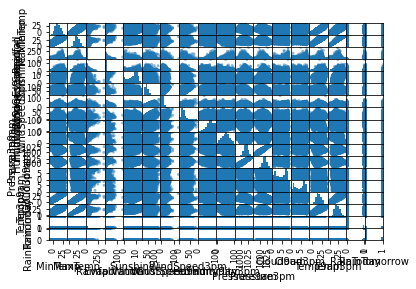

In [61]:
from pandas.plotting import scatter_matrix
scatter_matrix(rain_df)
plt.show() #plot is then shown using plt.show().

### 3) VISUALIZATION OF DATASET

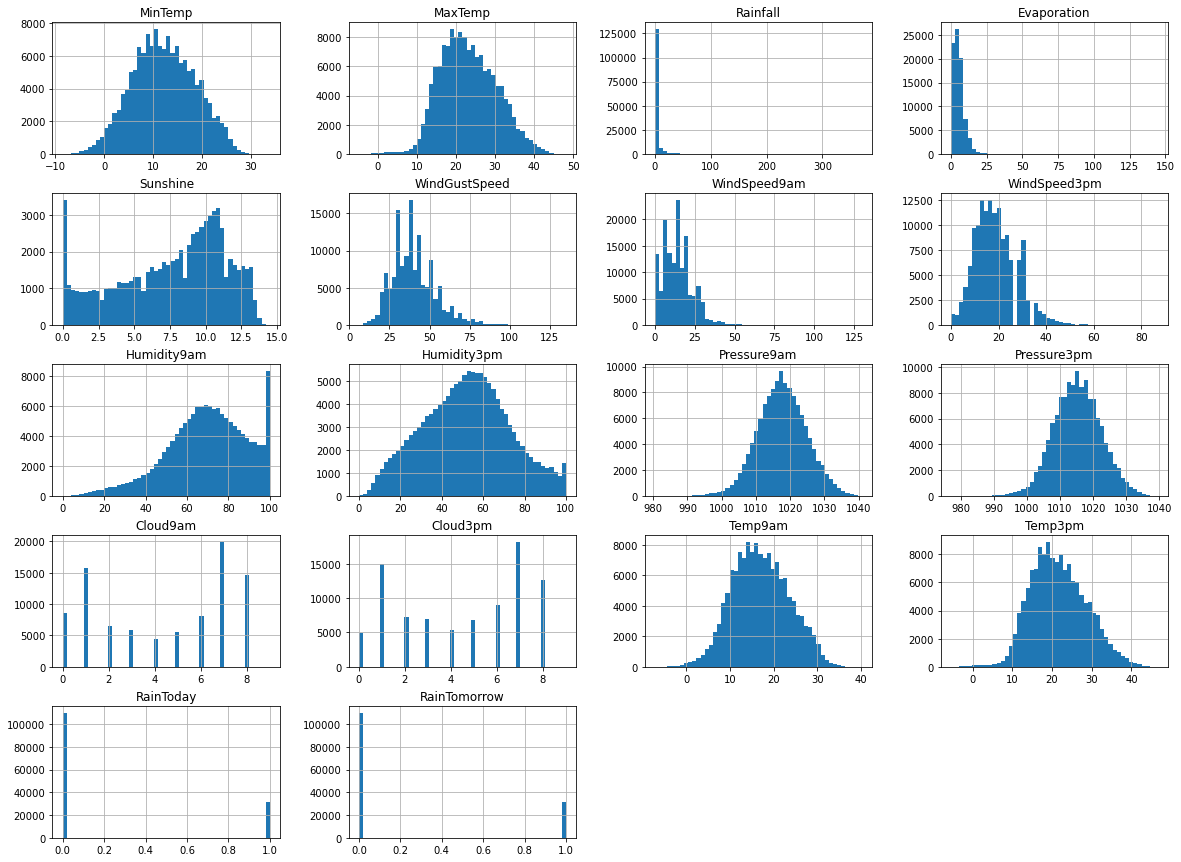

In [62]:
#Histogram of each attribute in rain_df.
import matplotlib.pyplot as plt
rain_df.hist(bins=50, figsize=(20, 15))
plt.show()

According to those histograms, we can see attributes: Humidity3pm, Pressure9am, Pressure3pm, MaxTemp, MinTemp, Temp9am, and Temp3pm.
Also, there are some categorical features such as: RainToday, RainTomorrow, Cloud9am, Cloud3pm.

However, more importantly, the regconition of some attribute has null ('0') values, which is impossible in term of its indexes and might affect the analysis in future, such as: skin thickness, insulin, glucose, blood pressure... So we have to processed those data for better understanding

## II) DATA CLEANING AND TRANSFORMATION

### 1) DEALING WITH MISSING VALUES

We will divide dataset into 2 parts (Categorical and Numerical)

### *Dealing with Categorical Missing Values*

In [63]:
# Get list of categorical variables
s = (rain_df.dtypes == "object") # Check if each column's data type is "object" (i.e., categorical)
object_cols = list(s[s].index) # Get the column names where the data type is "object" and convert them to a list

print("Categorical variables:") # Print the list of column names with categorical variables
print(object_cols)

Categorical variables:
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


In [64]:

# Missing values in numeric variables:This loop iterates through each column in the DataFrame and prints the column 
#name along with the number of null values in that column.

for i in object_cols:
    print(i, rain_df[i].isnull().sum())

Date 0
Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228


As can be seen, WindGustDir, WindDir9am, WindDir3pm have many missing values.

* In this dataset, I will replace the missing values with the mode of the column values.

* Because the mode is the most frequently occurring value in a column, and using it as a replacement for missing values can help to maintain the overall distribution and characteristics of the original data.

In [65]:
# Filling missing values with mode of the column in value

for i in object_cols:
    rain_df[i].fillna(rain_df[i].mode()[0], inplace=True)

### *Dealing with Numerical Missing Values*
* Filling missing values with median of the column value
* The reason we filled with median values is: the median is used for numerical data because it is not affected by extreme values and provides a robust measure of central tendency

In [66]:
# Get list of neumeric variables
t = (rain_df.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [67]:
# Missing values in numeric variables

for i in num_cols:
    print(i, rain_df[i].isnull().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609
RainToday 3261
RainTomorrow 3267


In [68]:
# Filling missing values with median of the column in value

for i in num_cols:
    rain_df[i].fillna(rain_df[i].median(), inplace=True)
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

### 2)Label encoding the catagorical variable
* Definition: Categorical variables are converted into numerical labels.
* The purpose: To convert categorical variables into a format that can be easily understood and processed by machine learning algorithms or statistical models, which typically require numerical inputs.
* In this dataframe, there are 5 categorical variable: Location, Data, WindGustDir, WindDir9am, WindDir3pm

In [69]:


# Apply label encoder to each column with categorical data:The code uses LabelEncoder() from scikit-learn library to transform 
#categorical variables into numerical variables. The for loop iterates over the categorical columns of the rain_df dataframe 
#and applies the label encoder to each column. Finally, it prints the info of the dataframe.

from sklearn.preprocessing import LabelEncoder # Import LabelEncoder from sklearn.preprocessing module

label_encoder = LabelEncoder() # Create an instance of LabelEncoder

for i in object_cols:
    # Apply label encoding to the column i in rain_df using the fit_transform() method of LabelEncoder
    rain_df[i] = label_encoder.fit_transform(rain_df[i])
    
rain_df.info() # Print information about the DataFrame rain_df after label encoding has been applied


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  int32  
 1   Location       145460 non-null  int32  
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  int32  
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  int32  
 10  WindDir3pm     145460 non-null  int32  
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

### 3) Feature Scaling

Reason for feature scaling before detecting outliers: 
* Ensures that all features contribute equally to the outlier detection process

In [70]:
# Prepairing attributes of scale data: performs feature scaling on the dataset using a standard scaler and generates descriptive 
#statistics for the scaled features. The target variable and the 'Date' column are dropped before scaling.
#from sklearn import preprocessing


from sklearn import preprocessing

# Drop the target and extra columns from the features DataFrame
features = rain_df.drop(['RainTomorrow', 'Date'], axis=1)

target = rain_df['RainTomorrow'] # Assign the 'RainTomorrow' column to the target variable

# Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()

features = s_scaler.fit_transform(features)

features = pd.DataFrame(features, columns=col_names) # Convert the scaled features back to a DataFrame with original column names

features.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,145460.0,-5.633017e-14,1.000003,-1.672228,-0.899139,0.014511,0.857881,1.701250
MinTemp,145460.0,-4.243854e-15,1.000003,-3.250525,-0.705659,-0.030170,0.723865,3.410112
MaxTemp,145460.0,6.513740e-16,1.000003,-3.952405,-0.735852,-0.086898,0.703133,3.510563
Rainfall,145460.0,9.152711e-15,1.000003,-0.275097,-0.275097,-0.275097,-0.203581,43.945571
Evaporation,145460.0,1.352327e-14,1.000003,-1.629472,-0.371139,-0.119472,0.006361,43.985108
Sunshine,145460.0,-4.338304e-15,1.000003,-2.897217,0.076188,0.148710,0.257494,2.360634
WindGustDir,145460.0,1.864381e-14,1.000003,-1.724209,-0.872075,0.193094,1.045228,1.471296
WindGustSpeed,145460.0,-1.167921e-14,1.000003,-2.588407,-0.683048,-0.073333,0.460168,7.243246
WindDir9am,145460.0,-7.433272e-15,1.000003,-1.550000,-0.885669,0.000105,0.885879,1.771653
WindDir3pm,145460.0,1.791486e-15,1.000003,-1.718521,-0.837098,0.044324,0.925747,1.586813


## 4) Detecting And Dropping Outliers

*Outliers Visualization*

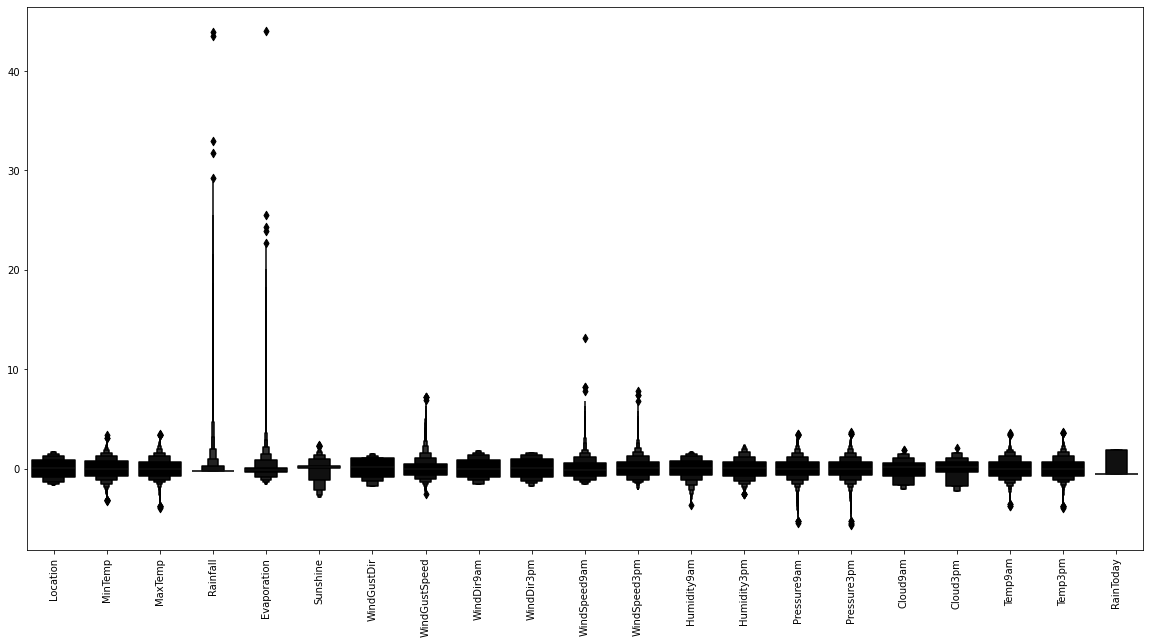

In [71]:

#Detecting outliers:creates a boxenplot for each feature in the features dataframe using seaborn, with a black color palette.
#looking at the scaled features
colours = ["#000000"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

*Drop the outliers*

##### How to calculate the outliers:

* Calculate the IQR of the dataset: IQR = Q3 (third quartile) - Q1 (first quartile)

* Define the lower bound for outliers: Q1 - (1.5 * IQR)

* Define the upper bound for outliers: Q3 + (1.5 * IQR)


In [72]:

#adds the target variable "RainTomorrow" back to the features dataframe.

features["RainTomorrow"] = target

#Dropping with outlier:This code filters the features dataframe by removing rows that have values outside certain ranges for specific columns.
# The ranges are likely determined based on domain knowledge or statistical analysis.

features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features = features[(features["Rainfall"]<4.5)]
features = features[(features["Evaporation"]<2.8)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]>-2.2)]
features = features[(features["Pressure9am"]< 2)&(features["Pressure9am"]>-2.7)]
features = features[(features["Pressure3pm"]< 2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]
features = features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]


features.shape

(127536, 22)

In [73]:


#sets the variable rain_df to the features dataframe, which has had outlier data removed.

rain_df = features #set features dataframe to rain_df(original dataframe)

In [74]:
rain_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,-1.531666,0.189757,-0.044575,-0.203581,-0.119472,0.14871,1.045228,0.307739,1.328766,1.366458,...,0.111308,-1.443652,-1.478015,-1.223012,1.464068,0.137693,-0.013506,0.019135,-0.529795,0.0
1,-1.531666,-0.752786,0.265794,-0.275097,-0.119472,0.14871,1.258262,0.307739,-0.221338,1.586813,...,-1.320650,-1.297105,-1.047010,-1.117969,0.149133,0.137693,0.033011,0.384064,-0.529795,0.0
2,-1.531666,0.111212,0.350440,-0.275097,-0.119472,0.14871,1.471296,0.460168,1.328766,1.586813,...,-1.638863,-1.052860,-1.492877,-0.982915,0.149133,-1.286294,0.622225,0.223495,-0.529795,0.0
3,-1.531666,-0.470023,0.674917,-0.275097,-0.119472,0.14871,-0.872075,-1.216548,0.442992,-1.718521,...,-1.267615,-1.736746,-0.006653,-0.367666,0.149133,0.137693,0.172562,0.705202,-0.529795,0.0
4,-1.531666,0.833828,1.281548,-0.155903,-0.119472,0.14871,1.045228,0.079096,-1.328556,-0.176032,...,0.694699,-0.906314,-1.017286,-1.388078,1.025756,1.561680,0.126045,1.172312,-0.529795,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,1.209285,-1.475402,0.025964,-0.275097,-0.119472,0.14871,-1.724209,-0.683048,0.442992,-1.498165,...,-0.949402,-1.345954,1.033703,0.757789,0.149133,0.137693,-1.067887,0.106718,-0.529795,0.0
145456,1.209285,-1.349730,0.294010,-0.275097,-0.119472,0.14871,-0.446007,-1.368977,0.442992,-1.057454,...,-0.684224,-1.492501,0.870219,0.577716,0.149133,0.137693,-0.943842,0.413259,-0.529795,0.0
145457,1.209285,-1.066967,0.519733,-0.275097,-0.119472,0.14871,-1.085108,-0.225761,0.442992,1.366458,...,-0.843331,-1.345954,0.498663,0.232577,0.149133,0.137693,-0.695753,0.646814,-0.529795,0.0
145458,1.209285,-0.689950,0.533840,-0.275097,-0.119472,0.14871,0.193094,-0.911691,0.664436,-1.057454,...,-0.949402,-1.345954,0.260867,0.187559,-0.727490,-1.286294,-0.292607,0.632217,-0.529795,0.0


As the result, there are only 127536 attribute vectors left, there are 17924 datapoints that do not meet standards, are classified as extreme outliers and removed from the  dataset (12.3% reduction)

*Create new index*

In order to avoid miss-indexing, we have to reset index of new dataset

In [75]:
#Create an index array
index=pd.Index([i for i in range(127536)])
#Reset the index of dataframe
rain_df.index=index

In [76]:
#Check the dataset reset 
rain_df.shape

(127536, 22)

# **III) EXPLORATORY DATA ANALYSIS AFTER CLEANING DATA**

## 1) Basic info

In [ ]:
rain_df.shape

In [ ]:
rain_df.head()

In [ ]:
col_names = rain_df.columns

col_names

In [ ]:
rain_df.info()

In [ ]:
rain_df.describe()

*Univariate Variable Exploration*
* Explore target variable "RainTomorrow". 

 ##### Check for missing values

In [ ]:
rain_df['RainTomorrow'].isnull().sum()

We can see that there are no missing values in the RainTomorrow target variable.

##### View number of unique values

In [ ]:
rain_df['RainTomorrow'].nunique()

We can see that the number of unique values in RainTomorrow variable is 2.

##### View the unique values

In [ ]:
rain_df['RainTomorrow'].unique() 
# 0: No , 1: Yes

The two unique values are No and Yes.

##### View the frequency distribution of values¶

In [ ]:
rain_df['RainTomorrow'].value_counts()

##### View percentage of frequency distribution of values

In [ ]:
rain_df['RainTomorrow'].value_counts()/len(rain_df)

We can see that out of the total number of RainTomorrow values, No appears 78.53% times and Yes appears 21.46% times.

##### Visualize frequency distribution of RainTomorrow variable

In [ ]:

#Visualizes the count of the target variable "RainTomorrow" using a seaborn countplot with a color palette of "Set1".

f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=rain_df, palette="Set1")
plt.show()

Interpretation
The above univariate plot confirms our findings that -

* The No variable have 110316 entries, and

* The Yes variable have 31877 entries.

We can plot the bars horizontally as follows :

In [ ]:

#The code creates a count plot to show the distribution of the target variable RainTomorrow using the seaborn library.
# The palette argument sets the color palette for the plot.

f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(y="RainTomorrow", data=rain_df, palette="Set1")
plt.show()

**Findings of Univariate Analysis**

* The number of unique values in RainTomorrow variable is 2.

* The two unique values are No and Yes.

* Out of the total number of RainTomorrow values, No appears 77.58% times and Yes appears 22.42% times.

* The univariate plot confirms our findings that –

  * The No variable have 110316 entries, and

  * The Yes variable have 31877 entries.

*Explore Location variable*

In [ ]:
# print number of labels in Location variable

print('Location contains', len(rain_df.Location.unique()), 'labels')

As can be seen, there are 49 labels according to each city in Australia that has been encoded into number. 

In [ ]:
# check labels in location variable
rain_df.Location.unique()

In [ ]:
# check frequency distribution of values in Location variable
rain_df.Location.value_counts()

*Explore WindGustDir variable*

In [ ]:
# print number of labels in WindGustDir variable

print('WindGustDir contains', len(rain_df['WindGustDir'].unique()), 'labels')

In [ ]:
# check labels in WindGustDir variable

rain_df['WindGustDir'].unique()

As can be seen, there are 16 different values for this variable

In [ ]:
# check frequency distribution of values in WindGustDir variable

rain_df.WindGustDir.value_counts()

*Explore WindDir9am variable*

In [ ]:
# print number of labels in WindDir9am variable

print('WindDir9am contains', len(rain_df['WindDir9am'].unique()), 'labels')

In [ ]:
# check labels in WindDir9am variable

rain_df['WindDir9am'].unique()

In [ ]:
# check frequency distribution of values in WindDir9am variable

rain_df['WindDir9am'].value_counts()

*Explore WindDir3pm variable*

In [ ]:
# print number of labels in WindDir3pm variable

print('WindDir3pm contains', len(rain_df['WindDir3pm'].unique()), 'labels')

In [ ]:
# check labels in WindDir3pm variable

rain_df['WindDir3pm'].unique()

In [ ]:
# check frequency distribution of values in WindDir3pm variable

rain_df['WindDir3pm'].value_counts()

*Explore RainToday variable*

In [ ]:
# print number of labels in RainToday variable

print('RainToday contains', len(rain_df['RainToday'].unique()), 'labels')

In [ ]:
# check labels in WindGustDir variable

rain_df['RainToday'].unique()

In [ ]:
# check frequency distribution of values in WindGustDir variable

rain_df.RainToday.value_counts()

correlation = rain_df.corr()

##### Heat map

In [ ]:
correlation = rain_df.corr()

In [ ]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

##### From the above correlation heat map, we can conclude that :-

* MinTemp and MaxTemp variables are highly positively correlated (correlation coefficient = 0.69).

* MinTemp and Temp3pm variables are also highly positively correlated (correlation coefficient = 0.66).

* MinTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.89).

* MaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.86).

* MaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.97).

* WindGustSpeed and WindSpeed3pm variables are highly positively correlated (correlation coefficient = 0.62).


In [ ]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

In [ ]:
sns.pairplot(rain_df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

I have defined a variable num_var which consists of MinTemp, MaxTemp, Temp9am, Temp3pm, WindGustSpeed, WindSpeed3pm, Pressure9am and Pressure3pm variables.

The above pair plot shows relationship between these variables

As we can see now all the attributes (except the target column) are successfully standardized (ranging from -1 to 1)

# III) TESTING MULTIPLE MODELS

- Splitting data into training and testing sets is crucial for evaluating machine learning model performance. The training set is used to train the model while the testing set is used to evaluate the model's performance on new data. This helps avoid overfitting, where the model performs well on training data but poorly on new data. 

- Normalization scales features to a similar range, ensuring no feature dominates others and improving machine learning algorithm performance. 

- fit_transform() calculates the mean and standard deviation of training data, scales it, and applies the same scaling to the test data.


In [ ]:
#This code selects a subset of columns from the rain_df dataframe and assign them to features. 
#The target variable is assigned to target. Then, the data is split into training and testing sets using the train_test_split 
#function from sklearn.model_selection. Finally, the features are normalized using StandardScaler from sklearn.preprocessing.

features = rain_df[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = rain_df['RainTomorrow']

# Split into test and train
#test_size : is set to 0.25 to indicate that 25% of the data should be used for testing.
#random_state : set to 12345 to ensure that the random splitting of the data is reproducible. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345) 


#Normalize data using sklearn StandardScaler:Standardize the numerical columns of the rain_df dataframe using StandardScaler() 
#from scikit-learn, excluding the target column. The standardized numerical data is stored in rain_scaled.

from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Fit the StandardScaler to the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the StandardScaler that was fit to the training data
X_test = scaler.transform(X_test)


- The ROC curve is used in binary classification to evaluate model performance by plotting true positive rate against false positive rate. It is a visual comparison of different models or threshold values. 
- The Matplotlib method legend() adds a legend to the plot, displaying labels of plotted lines or markers.

In [86]:

#This function plots a Receiver Operating Characteristic (ROC) curve given false positive rates and true positive rates.
#with the false positive rate on the x-axis and the true positive rate on the y-axis. The function also adds a diagonal line to represent the ROC curve of a random classifier,
# and a legend to identify the ROC curve and the random line.

def plot_roc_cur(fper, tper):  
    # Plot the ROC curve with false positive rate on the x-axis and true positive rate on the y-axis
    plt.plot(fper, tper, color='orange', label='ROC')
    
    # Plot a diagonal line from (0,0) to (1,1) to represent a random classifier
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    
    # Label the x and y axes
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Set the title of the plot
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    
    # Add a legend to the plot
    plt.legend()
    
    # Show the plot
    plt.show()


In [87]:


#This function runs a given machine learning model on training and testing data, prints evaluation metrics such as accuracy,
#ROC area under curve, Cohen's Kappa, and time taken for model training and prediction. It also generates a classification report,
#ROC curve plot, and a confusion matrix plot. The function returns the trained model, evaluation metrics, and plots.

import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    # Start timer
    t0 = time.time()
    
    # Fit the model to the training data
    if verbose == False:
        # If verbose is False, fit the model silently (without verbose output)
        model.fit(X_train, y_train, verbose=0)
    else:
        # Otherwise, fit the model with verbose output
        model.fit(X_train, y_train)
    
    # Predict the labels of the test data
    y_pred = model.predict(X_test)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    
    # Calculate time taken to fit the model and make predictions
    time_taken = time.time() - t0
    
    # Print evaluation metrics
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    
    # Print classification report with detailed metrics
    print(classification_report(y_test, y_pred, digits=5))
    
    # Compute ROC curve metrics
    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fper, tper, thresholds = roc_curve(y_test, probs)
    
    # Plot ROC curve
    plot_roc_cur(fper, tper)
    
    # Plot confusion matrix
    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize='all')
    
    # Return the trained model and evaluation metrics
    return model, accuracy, roc_auc, coh_kap, time_taken



### 1) LOGISTIC REGRESSION

In this case, we want to split the it into to train and test set with ratio 0.75 : 0.25, respectively

Accuracy = 0.8448438088069251
ROC Area under Curve = 0.7073383921184122
Cohen's Kappa = 0.47361548220060434
Time taken = 0.8740131855010986
              precision    recall  f1-score   support

         0.0    0.86704   0.94791   0.90567     25054
         1.0    0.70955   0.46676   0.56310      6830

    accuracy                        0.84484     31884
   macro avg    0.78829   0.70734   0.73439     31884
weighted avg    0.83330   0.84484   0.83229     31884



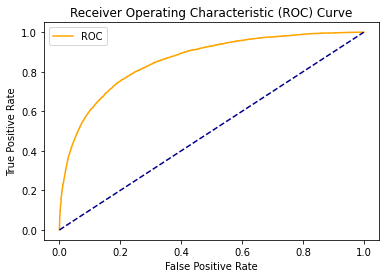

C:\Users\Thai\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


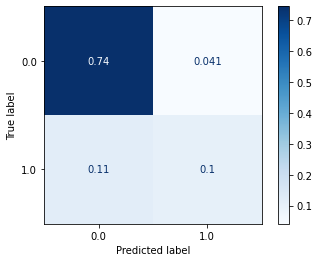

In [88]:

#The code runs a logistic regression model with specified parameters, prints evaluation metrics and plots ROC curve and confusion matrix.

# Import the LogisticRegression class from the sklearn.linear_model module
from sklearn.linear_model import LogisticRegression

# Define a dictionary of hyperparameters to be used by the model
params_lr = {'penalty': 'l1', 'solver':'liblinear'}

# Create a new LogisticRegression model object with the specified hyperparameters
model_lr = LogisticRegression(**params_lr)

# Call the run_model function with the new model object and training and testing data,
# and store the resulting values for model performance metrics
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)


### 2) Decision tree

Accuracy = 0.8110337473340861
ROC Area under Curve = 0.682150642460017
Cohen's Kappa = 0.39357951553259674
Time taken = 0.21200251579284668
              precision    recall  f1-score   support

         0.0    0.85970   0.90764   0.88302     25054
         1.0    0.57408   0.45666   0.50868      6830

    accuracy                        0.81103     31884
   macro avg    0.71689   0.68215   0.69585     31884
weighted avg    0.79852   0.81103   0.80283     31884



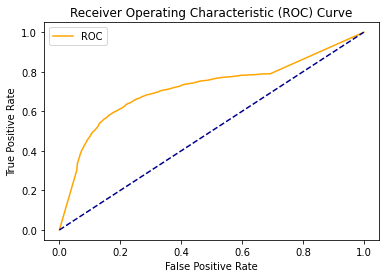

C:\Users\Thai\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


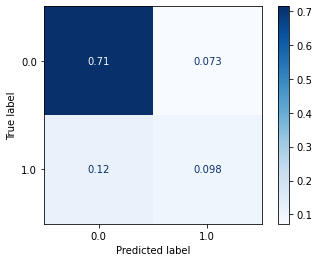

In [89]:
#This code trains and evaluates a decision tree classifier with specified hyperparameters using the run_model function.
#The resulting model's performance metrics are stored in accuracy_dt, roc_auc_dt, coh_kap_dt, and tt_dt.
#from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

### 3) Gaussian NB

Accuracy = 0.7998682724877682
ROC Area under Curve = 0.7345789843571853
Cohen's Kappa = 0.4410899958825909
Time taken = 0.06599807739257812
              precision    recall  f1-score   support

         0.0    0.89132   0.84881   0.86954     25054
         1.0    0.52798   0.62035   0.57045      6830

    accuracy                        0.79987     31884
   macro avg    0.70965   0.73458   0.72000     31884
weighted avg    0.81349   0.79987   0.80547     31884



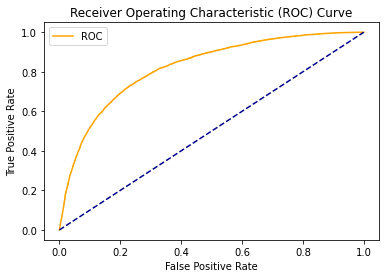

C:\Users\Thai\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


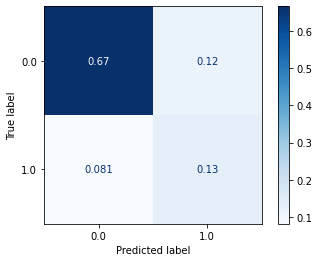

In [90]:

#This code fits a Gaussian Naive Bayes model on the training data and evaluates its performance on the test data using various 
#metrics including accuracy, ROC AUC, Cohen's Kappa, and classification report. Finally, it plots the ROC curve and confusion matrix.

from sklearn.naive_bayes import GaussianNB

params_gnb = {}

model_gnb = GaussianNB(**params_gnb)
model_gnb, accuracy_gnb, roc_auc_gnb, coh_kap_gnb, tt_gnb = run_model(model_gnb, X_train, y_train, X_test, y_test)

### 4) Random Forest

Accuracy = 0.8530924601681094
ROC Area under Curve = 0.7118948108688455
Cohen's Kappa = 0.4926831386666065
Time taken = 12.264798641204834
              precision    recall  f1-score   support

         0.0    0.86796   0.95893   0.91118     25054
         1.0    0.75523   0.46486   0.57549      6830

    accuracy                        0.85309     31884
   macro avg    0.81159   0.71189   0.74334     31884
weighted avg    0.84381   0.85309   0.83927     31884



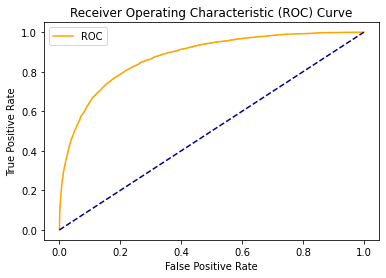

C:\Users\Thai\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


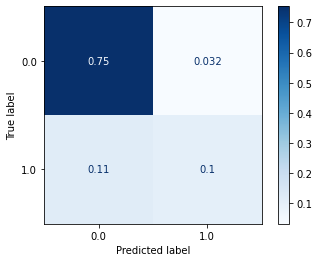

In [91]:

#This code uses the random forest classifier from scikit-learn library with some specific parameters to fit the model on 
#the training data and evaluate its performance on the test data. The model's accuracy, ROC AUC, Cohen's Kappa score, time taken
#for training and testing, and the classification report are printed to the console. Finally, the ROC curve and the confusion matrix 
#are plotted.

from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

### 5) KNeighborsClassifier

Accuracy = 0.8345251536820976
ROC Area under Curve = 0.6981100968321311
Cohen's Kappa = 0.44631958965582974
Time taken = 38.88991570472717
              precision    recall  f1-score   support

         0.0    0.86407   0.93678   0.89896     25054
         1.0    0.66455   0.45944   0.54328      6830

    accuracy                        0.83453     31884
   macro avg    0.76431   0.69811   0.72112     31884
weighted avg    0.82133   0.83453   0.82277     31884



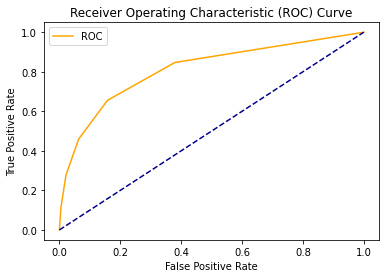

C:\Users\Thai\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


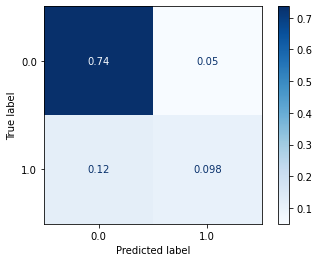

In [92]:
#This code uses the random forest classifier from scikit-learn library with some specific parameters to fit the model on the training data
#and evaluate its performance on the test data. The model's accuracy, ROC AUC, Cohen's Kappa score, time taken for training and testing, 
#and the classification report are printed to the console. Finally, the ROC curve and the confusion matrix are plotted.

from sklearn.neighbors import KNeighborsClassifier

params_knn = {'n_neighbors': 5, 
              'weights': 'uniform'}

model_knn = KNeighborsClassifier(**params_knn)
model_knn, accuracy_knn, roc_auc_knn, coh_kap_knn, tt_knn = run_model(model_knn, X_train, y_train, X_test, y_test)


### 6) Linear Discriminant Analysis

Accuracy = 0.8441851712457659
ROC Area under Curve = 0.7128299973083031
Cohen's Kappa = 0.4790795466184269
Time taken = 0.23399949073791504
              precision    recall  f1-score   support

         0.0    0.86994   0.94264   0.90483     25054
         1.0    0.69658   0.48302   0.57047      6830

    accuracy                        0.84419     31884
   macro avg    0.78326   0.71283   0.73765     31884
weighted avg    0.83280   0.84419   0.83321     31884



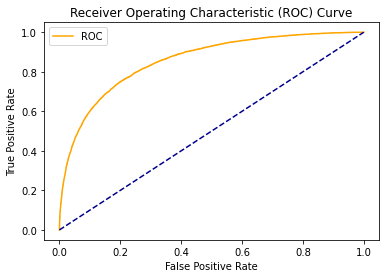

C:\Users\Thai\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


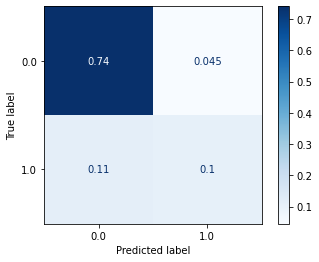

In [93]:

#This code uses Linear Discriminant Analysis to build a model, and then evaluates its performance using 
#accuracy, ROC AUC, Cohen's Kappa, time taken, and a classification report.

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

params_lda = {}

model_lda = LinearDiscriminantAnalysis(**params_lda)
model_lda, accuracy_lda, roc_auc_lda, coh_kap_lda, tt_lda = run_model(model_lda, X_train, y_train, X_test, y_test)

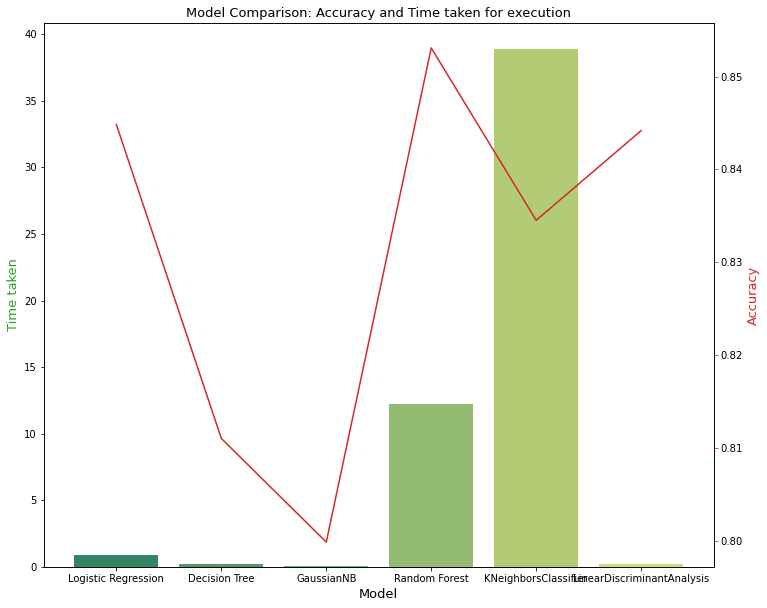

In [97]:

#This code compares the performance of six different machine learning models by computing their accuracy, ROC AUC, and Cohen's Kappa scores 
#on a test set. It then creates a bar chart of the time taken to fit each model and a line chart of their accuracy scores. The six models used 
#are Logistic Regression, Decision Tree, GaussianNB, Random Forest, K-Nearest Neighbors, and Linear Discriminant Analysis.

accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_gnb, accuracy_rf, accuracy_knn, accuracy_lda]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_gnb, roc_auc_rf, roc_auc_knn, roc_auc_lda]
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_gnb, coh_kap_rf, coh_kap_knn, coh_kap_lda]
tt = [tt_lr, tt_dt, tt_gnb, tt_rf, tt_knn, tt_lda,]

model_data = {'Model': ['Logistic Regression','Decision Tree','GaussianNB','Random Forest','KNeighborsClassifier','LinearDiscriminantAnalysis'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

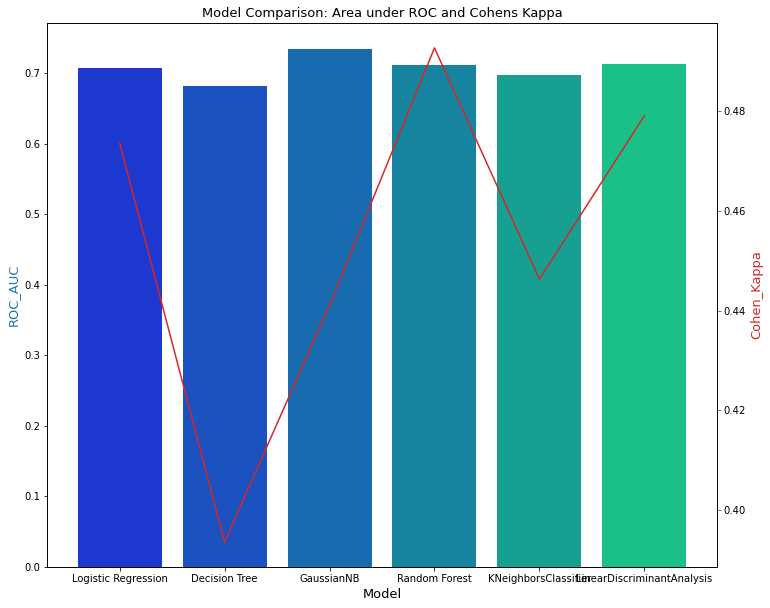

In [98]:

#The code creates two plots: one comparing accuracy and time taken for execution of different models, 
#and the other comparing area under ROC and Cohen's kappa for the same models. The plots show the performance of the different models on 
#the dataset.

fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

## IV) BUILDING THE BEST MODEL FOR PREDICTION

### 1) Analysis of two models: Logistic Regression and Random Forest

The following confusion matrices and classification reports will give us a brief overview of the 2 most effective models 


### CONFUSION MATRIX

In this dataset, we concentrate on the number of True Positive and True Nagative as we want correct predictions


#This code creates a confusion matrix using seaborn visualization for the Logistic Regression model. 
#It first fits the model to the training data, then makes predictions on the test data, computes the confusion matrix using the predicted 
#and true labels, and finally visualizes it using a heatmap. The plot shows the true and predicted labels on the x and y axis, respectively, 
#and annotates the cells with the count of samples.

from sklearn.metrics import confusion_matrix
import seaborn as sns
#Logistic Regression
lr=LogisticRegression()
lr.fit(X_train,y_train)
predictions1=lr.predict(X_test)
cm1=confusion_matrix(y_test,predictions1)
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm1, annot=True, ax = ax,linewidths=.5); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Negative', 'Positive']);

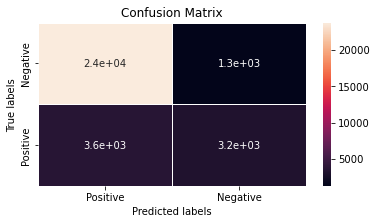

In [ ]:
#It first fits the model to the training data, then makes predictions on the test data, 
#computes the confusion matrix using the predicted and true labels, and finally visualizes it using a heatmap. 
#The plot shows the true and predicted labels on the x and y axis, respectively, and annotates the cells with the count of samples.
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Logistic Regression
lr=LogisticRegression()

#Fits the model
lr.fit(X_train,y_train)

#Makes predictions
predictions1=lr.predict(X_test)

#Computes confusion matrix
cm1=confusion_matrix(y_test,predictions1)

#Visualizes
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm1, annot=True, ax = ax,linewidths=.5); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Negative', 'Positive']);


#Random Forest:This code trains a Random Forest classifier on the training data, makes predictions on the test data, calculates the confusion
# matrix, and displays it using a heatmap with annotations. The code is similar to the previous code for logistic regression, but with Random
# Forest instead of logistic regression.

rf=RandomForestClassifier()
rf.fit(X_train,y_train)
predictions2=rf.predict(X_test)
cm2=confusion_matrix(y_test,predictions2)
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm2, annot=True, ax = ax,linewidths=.5); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Negative', 'Positive']);

In [102]:


#The code is generating a confusion matrix and heatmap for the Random Forest model and printing the values of true positive,
#false positive, true negative, and false negative. These metrics are useful in evaluating the performance of the model.

tn, fp, fn, tp = confusion_matrix(y_test,predictions2).ravel()
print('True Positive:', tp,';',
      'False Positive:', fp,';',
      'True Negative:', tn,';',
      'False Negative', fn)

True Positive: 3222 ; False Positive: 1072 ; True Negative: 23982 ; False Negative 3608




### **** CLASSIFICATION REPORT ****


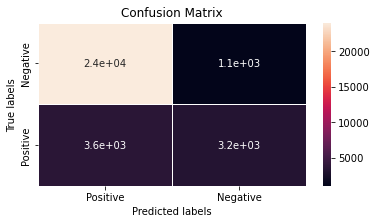

In [ ]:
#Random Forest
rf=RandomForestClassifier()

#Fits the model
rf.fit(X_train,y_train)

#Makes predictions
predictions2=rf.predict(X_test)

#Computes confusion matrix
cm2=confusion_matrix(y_test,predictions2)

#Visualizes
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm2, annot=True, ax = ax,linewidths=.5); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Negative', 'Positive']);

The code is generating a confusion matrix and heatmap for the Random Forest model and printing the values of true positive, false positive, true negative, and false negative. These metrics are useful in evaluating the performance of the model.

In [104]:
tn, fp, fn, tp = confusion_matrix(y_test,predictions2).ravel()
print('True Positive:', tp,';',
      'False Positive:', fp,';',
      'True Negative:', tn,';',
      'False Negative', fn)

True Positive: 3222 ; False Positive: 1072 ; True Negative: 23982 ; False Negative 3608


### CLASSIFICATION REPORT

In [106]:
from sklearn.metrics import confusion_matrix

#Logistic Regression
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     25054
         1.0       0.71      0.47      0.56      6830

    accuracy                           0.84     31884
   macro avg       0.79      0.71      0.73     31884
weighted avg       0.83      0.84      0.83     31884



In [107]:
#Random Forest
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     25054
         1.0       0.75      0.47      0.58      6830

    accuracy                           0.85     31884
   macro avg       0.81      0.71      0.75     31884
weighted avg       0.84      0.85      0.84     31884



## 2) FINDING THE BEST MODEL BY GRIDSEARCH

### A- Random Forest

In [121]:

#This code is performing a randomized search for hyperparameter tuning of a random forest classifier using the RandomizedSearchCV 
#function from scikit-learn. The hyperparameters being tuned are n_estimators, max_depth, min_samples_split, and min_samples_leaf. 
#The search is being conducted over 50 iterations and the accuracy metric is used to evaluate the performance of each set of hyperparameters.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 8),
    'min_samples_leaf': randint(1, 3),
}

model_rf = RandomForestClassifier(random_state=42)

rand_search = RandomizedSearchCV(model_rf, param_distributions=param_dist, cv=5, n_iter=50, n_jobs=-1, scoring='accuracy')
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C806D1A280>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C806D1A4C0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C8458DD730>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C8450AB550>},
                   scoring='accuracy')

The parameter above is the best parameter for LinearDiscriminantAnalysis model, we will use it the build the model

In [129]:
# Print the bext score found
print("Best score:", rand_search.best_score_)
print("Best parameters:", rand_search.best_params_)


Best score: 0.8538869723243897
Best parameters: {'max_depth': 19, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 101}


#### B-Logistic Regression

a) Penalty testing - advoid overfitting

In [109]:
#RIDGE REGRESSION (L2 PENALTY)
#This code performs a grid search on a Ridge regression model with different values of the regularization parameter alpha. 
#The best value of alpha and the corresponding best score (negative mean squared error) are printed out.

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge=Ridge()
parameters= {'alpha':[2,4,6,8,10]}
ridge_reg=GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error',cv=10)
ridge_reg.fit(X_train,y_train)
print("The best parameter is:",ridge_reg.best_params_)
print("The best score for this penalty is",ridge_reg.best_score_)

The best parameter is: {'alpha': 10}
The best score for this penalty is -0.11777986012683332


In [110]:
#LASSO REGRESSION (L1 PENALTY)
#The code performs grid search using cross-validation to find the best hyperparameters for Ridge and Lasso regression models. 
#It prints the best hyperparameters and the corresponding best score for each model.

from sklearn.linear_model import Lasso

parameters= {'alpha':[2,4,6,8,10]}

lasso=Lasso()
lasso_reg=GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=10)
lasso_reg.fit(X_train,y_train)
print("The best parameter is:",lasso_reg.best_params_)
print('The best score for this penalty is: ',lasso_reg.best_score_)

The best parameter is: {'alpha': 2}
The best score for this penalty is:  -0.16868041982646442


The above testing points out that the L2 penalty with alpha= 10 would be more effective for our model (-0.11<-0.16)

**b) Best parameter for Logistic Regression**

In [112]:
#This code is performing a grid search to find the best hyperparameters for a logistic regression model. 
#The grid consists of three hyperparameters: penalty, C, and solver. The code then fits the logistic regression model with the
# best hyperparameters found by the grid search, and prints the best score for the model.

param_grid2 = {
    'penalty':['l2'],
    'C':[1.0,10.0,50.0],
    'solver':['newton-cg', 'lbfgs', 'liblinear']
}

model_lr= LogisticRegression()

grid_search2 = GridSearchCV(
    model_lr, param_grid2, cv=10, scoring='accuracy')
grid_search2.fit(X_train, y_train)
print("The best score for this model is",grid_search2.best_score_)

The best score for this model is 0.8434114855507927


Since 2 models: Random Forest and Logistic Regression with optimized parameter have the same best accuracy score, we can build either one of them for our prediction

## 3) APPLY THE BEST PARAMETERS TO THE MODEL AND TRAIN IT

We choose Logistic Regression with L2 penalty and compatable parameter computed above

In [130]:
# Create an instance of the algorithm using parameters
# from best_estimator_ property
lr = grid_search2.best_estimator_

In [131]:
# Use the whole dataset to train the model
X = np.append(X_train, X_test, axis=0)
Y = np.append(y_train, y_test, axis=0)

In [132]:
# Train the model
lr.fit(X, Y)

LogisticRegression(C=50.0, solver='newton-cg')

## 4) MODIFY THE THRESHOLD

In [181]:
#Define a function to optimize the threshold
#This is a function to optimize the threshold value for a binary classification model. 
#It takes a model as input, and returns a list of threshold values that achieve a recall of at least 0.9 and an F1 score 
#of at least 0.7 on the test data. It does this by iteratively trying threshold values between 0.01 and 1.00, calculating the confusion matrix,
#recall, precision, and F1 score for each threshold value, and storing the threshold values that meet the criteria in a list.

def optimize_threshold(model):
    bestthresh = []
    for i in range(1,101):
        threshold = i/100
        pred = np.where(model.predict_proba(X_test)[:,1] > threshold, 1, 0)
        tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
        recall = tp / (tp + fn)
        precision = tp / (tp + fp)
        f1 = (2*recall*precision)/(recall+precision)
        if recall>=0.9 and f1>=0.7:
            bestthresh.append(threshold)
    return bestthresh

This function will return a list of best thresholds for our model. We want to obtain only threshold with recall >=0.9 and f1 >=0.7, which can not only maximize the recall, minimize the False Negative problem, but also balance the interrelation between recall and precision

In [ ]:
# print('Logistic Regression')
# optimize_threshold(lr)
#The optimize_threshold() function takes a model as input, fits the model on the training data, predicts probabilities on the test data, 
#loops over different threshold values to calculate performance metrics, and returns the best threshold and F1 score. 
#The code then applies the optimize_threshold() function to the lr logistic regression model and prints the best threshold and F1 score.


def optimize_threshold(model):
    # fit the model on training data
    model.fit(X_train, y_train)
    
    # predict probabilities on test data
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # loop over different threshold values and calculate performance metrics
    best_threshold = 0
    best_f1 = 0
    for threshold in np.arange(0, 1.01, 0.01):
        y_pred = (y_pred_prob >= threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        precision = tp / (tp + fp) if tp + fp > 0 else np.nan
        recall = tp / (tp + fn)
        f1 = 2 * precision * recall / (precision + recall) if precision + recall > 0 else np.nan
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
            
    # return the best threshold and F1 score
    return best_threshold, best_f1

print('Logistic Regression')
optimize_threshold(lr)




Logistic Regression


(0.31, 0.6150117712228222)

In [183]:
print('Random Forest')
optimize_threshold(rf)

Random Forest


(0.34, 0.6470872113064461)

From the result, we can see optimized thresholds are 0.31 and 0.34 for Logistic Regression and Random Forest respectively. Then if the probability belongs to '1' class is larger than 0.31 for Linear Regression model and 0.34 for Random Forest model, then it is predicted to be raining in the next day.

# V) MAKE PREDICTIONS

In [ ]:
#This code creates a new DataFrame called new_data containing a row of randomly generated numbers between 0 and 1 with a length equal to the 
#Then, it scales the values in new_data using the scaler object created earlier and stores the 
#result in a new DataFrame called new_data_scaled.

# We create a new (fake) person information
new_data = pd.DataFrame([[-1.531666, 0.189757, -0.044575, -0.203581, -0.119472, 0.14871, 1.045228, 0.307739, 1.328766, 1.366458, 0.111308, -1.443652, 0.111308, -1.443652, -1.478015, -1.223012, 1.464068, 0.137693, -0.013506, 0.019135, -0.529795]])

# We scale those values like the others
new_data_scaled = new_scaler.fit_transform(new_data)

C:\Users\Thai\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [177]:
# We modify the threshold
prediction = rf.predict_proba(new_data_scaled)[:,1]
prediction

In [178]:
# A value of "1" means that itis likely to rain
if prediction > 0.31:
    print("It is raining tomorrow")
else:
    print("It is not raining tomorrow")

#We use Linear Regression model in this case

It is not raining tomorrow


Prediction points out that with information:
<br><br>
(-1.531666, 0.189757, -0.044575, -0.203581, -0.119472, 0.14871, 1.045228, 0.307739, 1.328766, 1.366458, 0.111308, -1.443652, 0.111308, -1.443652, -1.478015, -1.223012, 1.464068, 0.137693, -0.013506, 0.019135, -0.529795)
<br><br>
 (Location| MinTemp| MaxTemp| Rainfall| Evaporation| Sunshine| WindGustDir| WindGustSpeed| WindDir9am| WindDir3pm| WindSpeed9am| WindSpeed3pm| Humidity9am| Humidity3pm| Pressure9am| Pressure3pm| Cloud9am| Cloud3pm| Temp9am| Temp3pm| RainToday) 
 <br><br>
 is predicted 'not raining' towards 'RainTomorrow'

In [179]:
#Define a function using the logic above for quicker and more convenient prediction:
def prediction(data):
    data_scaled=scaler.transform(data)
    predict=lr.predict_proba(data_scaled)[:,1]
    if predict > 0.33:
        print("It is raining tomorrow")
    else:
        print("It is not raining tomorrow")


***Warning: The data passed in the function defined has to be a dataframe***


Let's check again with data of another person, using our function:

In [180]:
data= pd.DataFrame([np.random.uniform(0,1,len(rain_scaled_df.columns)-1)])
prediction(data)

It is raining tomorrow


C:\Users\Thai\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Our prediction model points out that this red with information: (6, 168, 72, 35, 0, 43.6, 0.627, 65) (Pregnancy= 6 times, Glucose level= 168mg/dL, BloodPressure= 72mmHg, SkinThickness =35mm, Insulin level= 0mIU/L, BMI= 43.6, Age= 65 years, DiabetesPedigreeFunction= 0.627) is diagnosed 'negative' towards type II diabetes

# VI) CONCLUSION

We finally find a score of 80.3% using Logistic Regression algorithm with Ridge Penalty and parameters optimisation. Please note that there may be still space for further analysis and optimisation. Training a machine learning model to solve a problem with a specific dataset is a test/fail/improve process. And according to our knowledge in Data Science subject until now, this is the best model achieved.

# RESOURCES

Below is the resources that we've been using during the project.

[1] Title: Weather Dataset (Rattle Package)
URL: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package
Publisher: Kaggle

[2] Title: Practical Guide to 6 Classification Algorithms
URL: https://www.kaggle.com/code/faressayah/practical-guide-to-6-classification-algorithms#%F0%9F%94%8D-Exploratory-Data-Analysis-(EDA)
Publisher: Kaggle
Author: Faress Ayah

[3] https://pandas.pydata.org

[4] https://scikit-learn.org/stable/

[5] https://numpy.org/

4) https://www.datacamp.com

# ***THANK YOU FOR PAYING ATTENTION***